In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Data
We load the neural codes for the Caltech101 image data set, obtained from a pre-trained VGG16 network in "Practical-3.3.0_preprocess-caltech101.ipynb".

In [2]:
fold_path = os.path.join("data", "caltech101")
with open(os.path.join(fold_path, "caltech101_VGG16_fc2.p"), "rb") as f:
    X_fc2, y, X_paths, classes = pickle.load(f)

# Nearest Neighbor Classifier
For image search, we can train a simple nearest neighbor classifier from scikit-learn. Here we use the L2-norm (Lp-norm with p=2) as a distance measure between representations.

In [3]:
neigh = NearestNeighbors(n_neighbors=5, p=2)
neigh.fit(X_fc2)

NearestNeighbors()

Let's test it on some images from the dataset itself. For each example input image, we obtain the (L2) distances to its 5 nearest neighbors, as well as the indices of those nearest neighbors.

In [4]:
indices = [1000, 1500, 2000]
X = X_fc2[indices]
nn = neigh.kneighbors(X)
nn  # nn = (distances, indices)

(array([[ 0.        , 49.22524714, 49.68365583, 50.40341927, 50.59785202],
        [ 0.        , 47.22711995, 48.92163901, 49.85443499, 50.401127  ],
        [ 0.        , 75.12099623, 75.36895761, 76.61523969, 76.70851282]]),
 array([[1000,  993, 1063, 1202, 1479],
        [1500, 1126, 1771, 1063, 1307],
        [2000, 1985, 1997, 6860, 6003]]))

Let's visualise the examples (input images) we chose.

Class: airplanes


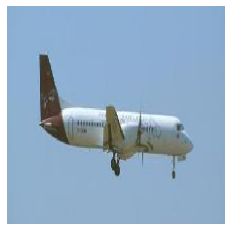

Class: airplanes


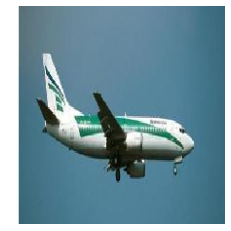

Class: elephant


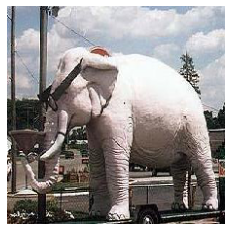

In [5]:
def show_img(filepath):
    img = image.load_img(filepath, target_size=(224,224))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

for i in indices:
    print("Class:", classes[y[i]])
    show_img(X_paths[i])

Now we visualise each of the input images along with their 5 nearest neighbors.

Classes:
airplanes
airplanes
elephant


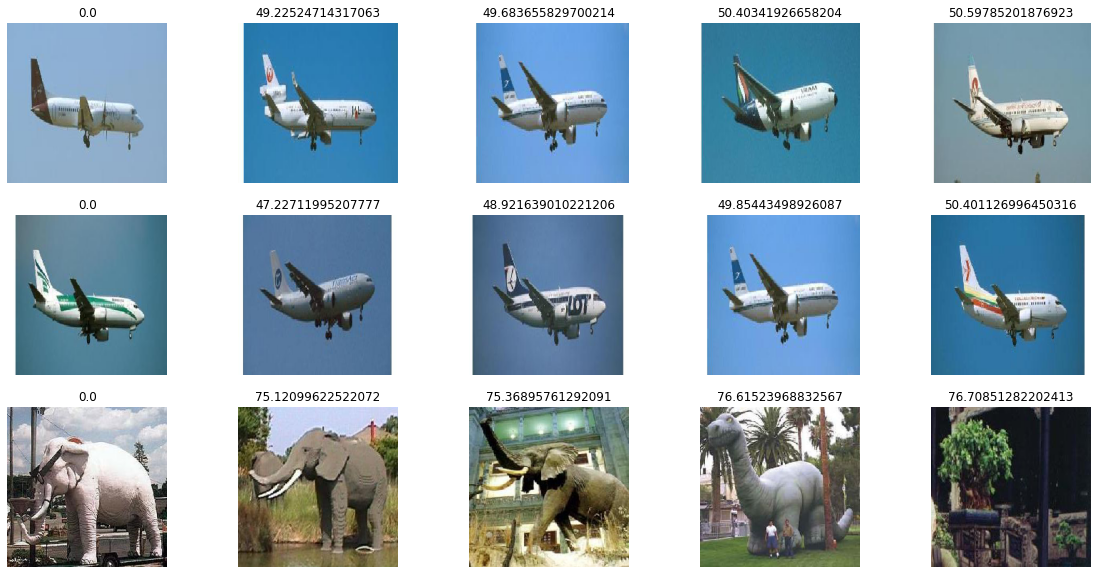

In [6]:
n_images, n_neighbours = nn[0].shape
fig, axes = plt.subplots(n_images, n_neighbours, sharex=True, sharey=True, figsize=(20,10))
print("Classes:")
for distances, indices, row_axes in zip(*nn, axes):
    print(classes[y[indices[0]]])
    for distance, index, ax in zip(distances, indices, row_axes):
        img_path = X_paths[index]
        img = image.load_img(img_path, target_size=(224,224))
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"{distance}")